In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix

In [5]:
df = pd.read_csv("spam.csv", encoding='latin=1')
df = df[['v1','v2']]
df.columns = ['label', 'message']

In [7]:
df.head()
df['label'].value_counts()

,count
label,
ham,4825
spam,747


In [8]:
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

In [12]:
X = df['message']
y = df['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [22]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [29]:
y_pred = model.predict(X_test_tfidf)
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Acurácia: 0.9623318385650225
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



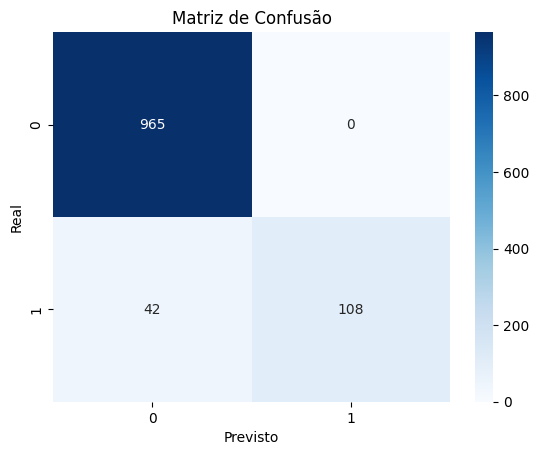

In [32]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [38]:
nova_menssagem = ["Você ganhou um viajem para barramas de graça, click aqui para receber!"]
nova_tfidf = vectorizer.transform(nova_menssagem)
resultado = model.predict(nova_tfidf)[0]
print("Resultado:", "SPAM" if resultado == 1 else "NÃO É SPAM")

Resultado: NÃO É SPAM
